In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import *

## **Problem Statement:**
Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.

## **Dataset Attributes:**
1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. No_of_item - Different types of items provided by restaurant
6. Order_Placed - Order placed by customer to restaurant (in lacs)
7. Revenue - Total amount of income generated by the restaurant

In [6]:
df = pd.read_csv('revenue_prediction.csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [11]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('Feature Name : ',i)
        print(df[i].unique())
        print("==========================================================")

Feature Name :  Name
["HungryHowie'sPizza" 'CharleysPhillySteaks' "Chuy's" "O'Charley's"
 'PolloTropical' "Maggiano'sLittleItaly" 'Cicis' "LongJohnSilver's"
 'SaltgrassSteakHouse' "ChuckE.Cheese's" "TacoJohn's"
 'TexasdeBrazilChurrascaria' 'ColdStoneCreamery' 'BlazePizza'
 "Peet'sCoffee" "Dickey'sBarbecuePit" 'ZoesKitchen' 'CornerBakery_Cafe'
 'KrystalCo.' 'Benihana' "Cooper'sHawkWinery&Restaurants"
 "BigBoy/Frisch'sBigBoy" 'BlackBearDiner' 'TwinPeaks' "Schlotzsky's"
 "Jet'sPizza" "FamousDave's" 'OnTheBorderMexicanGrill&Cantina'
 'FogodeChao' 'NinetyNineRestaurants' 'VillageInn' 'TacoCabana'
 "Fleming'sPrimeSteakhouse&WineBar" 'CaribouCoffee' "Jack's" 'AuBonPain'
 'BarLouie' 'SarkuJapan' 'OldChicagoPizza&Taproom' "Rally'sHamburgers"
 "Torchy'sTacos" 'PizzaRanch' 'PappadeauxSeafoodKitchen'
 "Braum'sIceCream&DairyStores" 'PeiWeiAsianDiner' 'CafeRioMexicanGrill'
 "Morton'sTheSteakhouse" 'Smashburger' 'Wienerschnitzel' 'Sizzler'
 'Seasons52' 'BahamaBreezeIslandGrille' 'PretAManger' "Godfat

In [12]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [26]:
#label enocoding --- original vs encoded
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col]) # it will transform data in the data set as well
        print(f'Column Name : {col}')
        print("Original ---> Encoded")
        for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
            print(f'{original_class}->{encoded_value}')
        print()

Column Name : Name
Original ---> Encoded
A&WAll-AmericanFood->0
AuBonPain->1
BahamaBreezeIslandGrille->2
BarLouie->3
Benihana->4
BigBoy/Frisch'sBigBoy->5
BlackBearDiner->6
BlazePizza->7
Braum'sIceCream&DairyStores->8
BrioTuscanGrille->9
BubbaGumpShrimpCo.->10
BucadiBeppo->11
CafeRioMexicanGrill->12
CaribouCoffee->13
CharleysPhillySteaks->14
ChuckE.Cheese's->15
Chuy's->16
Cicis->17
Cinnabon->18
ClaimJumper->19
ColdStoneCreamery->20
Cooper'sHawkWinery&Restaurants->21
CornerBakery_Cafe->22
DelFrisco'sDoubleEagleSteakHouse->23
Dickey'sBarbecuePit->24
DonatosPizza->25
FamousDave's->26
FarmerBoys->27
Fazoli's->28
FirebirdsWoodFiredGrill->29
Fleming'sPrimeSteakhouse&WineBar->30
FogodeChao->31
Friendly's->32
Fuddruckers->33
Fuzzy'sTacoShop->34
Giordano's->35
Godfather'sPizza->36
GoldenChick->37
HardRockCafe->38
HuddleHouse->39
HungryHowie'sPizza->40
IslandsFineBurgers&Drinks->41
J.Alexander's->42
Jack's->43
Jet'sPizza->44
JohnnyRockets->45
KrystalCo.->46
LaMadeleineCountryFrenchCafe->47
LazyDo

## **Model Building**

In [28]:
# Data Splitting
x = df.iloc[:,:-1]
y = df['Revenue']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [30]:
print('size of training set : ',x_train.shape[0])
print('size of testing set : ',x_test.shape[0])

size of training set :  75
size of testing set :  25


In [31]:
models = { 
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(n_estimators=50),
    'SVR' : SVR()
}         

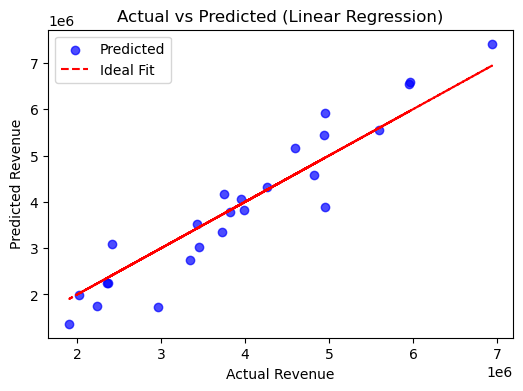

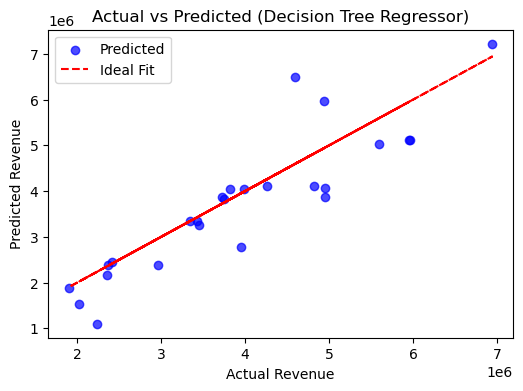

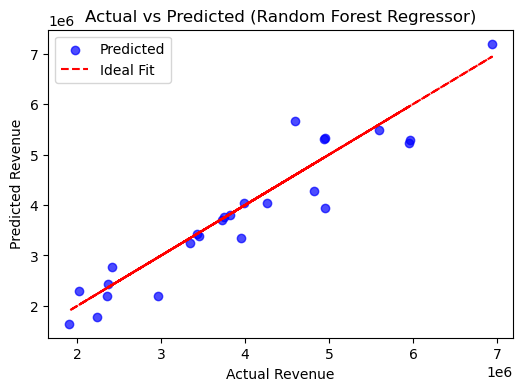

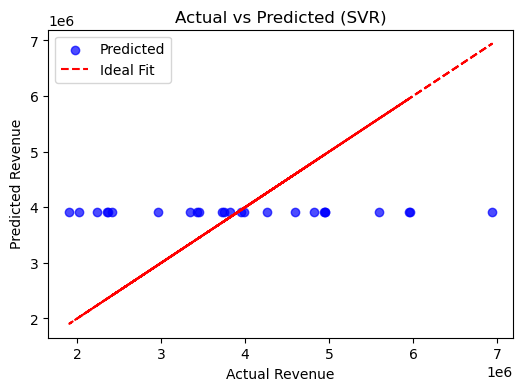

In [32]:
# Evaluate each model
results = []

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, mse, rmse, mae])

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted")
    plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")
    plt.xlabel("Actual Revenue")
    plt.ylabel("Predicted Revenue")
    plt.title(f"Actual vs Predicted ({name})")
    plt.legend()
    plt.show()

In [35]:
# Convert results to a DataFrame for better visualization
df_results = pd.DataFrame(results, columns=["Model", "R² Score", "MSE", "RMSE", "MAE"])
df_results = df_results.sort_values(by="R² Score", ascending=False)
print(df_results.to_string(index=False))

                  Model  R² Score          MSE         RMSE          MAE
Random Forest Regressor  0.878585 2.145395e+11 4.631841e+05 3.446614e+05
      Linear Regression  0.837836 2.865435e+11 5.352976e+05 4.254258e+05
Decision Tree Regressor  0.717916 4.984404e+11 7.060031e+05 5.126680e+05
                    SVR -0.000472 1.767827e+12 1.329597e+06 1.081020e+06
